In [6]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import network_generation as homomul
import spread_simulation
import homophily_multi_attr_viz as viz
from tqdm.notebook import tqdm

# Spread based on Consolidation and Homophily

In [8]:
model_settings = {
    'N': 3200,
    'm': 5,
    'consolidation_param': 0.1,
    'marginal_distribution': [[0.5,0.5],[0.5,0.5]],
    'homophily': 0.8,
    'complex_threshold': 0.16,
    'initial_seed_filter': lambda x: x.nodes
}

experiment_settings = {
    'n_networks': 2,
    'n_initial_seeds': 5
    }


spread_simulation.batch_simulate(model_settings, experiment_settings)

(0.10503124999999999, 0.1, 14.0)

  0%|          | 0/66 [00:00<?, ?it/s]

consolidation_param: 0.00 / homophily: 0.00 => avg = 0.01; global = 0.00; avg iter = nan
consolidation_param: 0.00 / homophily: 0.10 => avg = 0.01; global = 0.00; avg iter = nan
consolidation_param: 0.00 / homophily: 0.20 => avg = 0.01; global = 0.00; avg iter = nan
consolidation_param: 0.00 / homophily: 0.30 => avg = 0.01; global = 0.00; avg iter = nan
consolidation_param: 0.00 / homophily: 0.40 => avg = 0.01; global = 0.00; avg iter = nan
consolidation_param: 0.00 / homophily: 0.50 => avg = 0.01; global = 0.00; avg iter = nan
consolidation_param: 0.00 / homophily: 0.60 => avg = 0.01; global = 0.00; avg iter = nan
consolidation_param: 0.00 / homophily: 0.70 => avg = 0.01; global = 0.00; avg iter = nan
consolidation_param: 0.00 / homophily: 0.80 => avg = 0.11; global = 0.10; avg iter = 10.0
consolidation_param: 0.00 / homophily: 0.90 => avg = 0.31; global = 0.30; avg iter = 14.0
consolidation_param: 0.00 / homophily: 1.00 => avg = 0.20; global = 0.00; avg iter = nan
consolidation_param

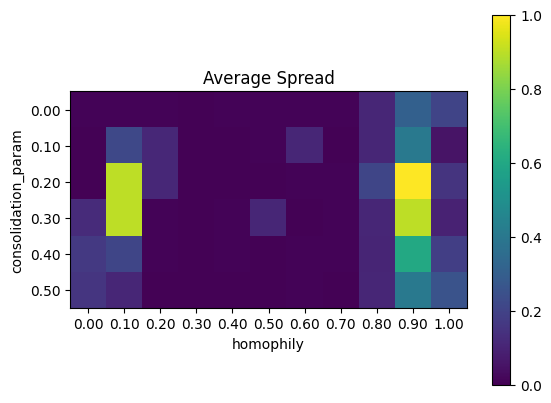

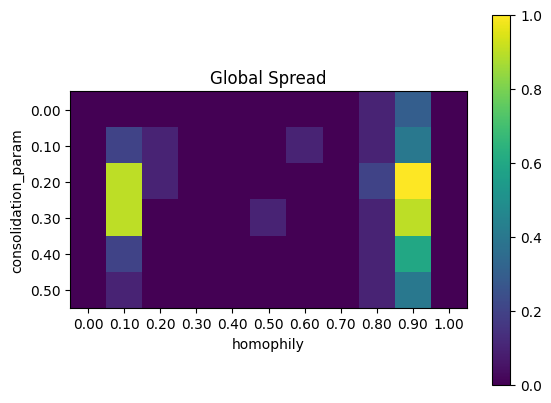

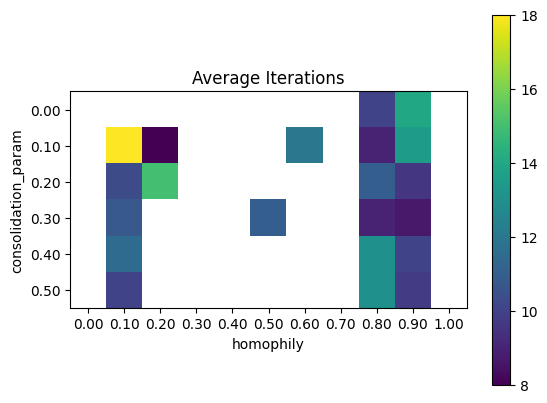

In [9]:
homophily_settings = np.linspace(0,1,11)
consolidation_settings = np.linspace(0,0.5, 6)

r_avg, r_spread, r_iter = spread_simulation.setting_simulate('consolidation_param', consolidation_settings,
                                                             'homophily', homophily_settings,
                                                             model_settings, experiment_settings)


  0%|          | 0/60 [00:00<?, ?it/s]

consolidation_param: 0.00 / homophily: 0.80 => avg = 0.21; global = 0.20; avg iter = 11.0
consolidation_param: 0.00 / homophily: 0.82 => avg = 0.21; global = 0.20; avg iter = 10.5
consolidation_param: 0.00 / homophily: 0.84 => avg = 0.21; global = 0.20; avg iter = 9.0
consolidation_param: 0.00 / homophily: 0.87 => avg = 0.21; global = 0.20; avg iter = 10.5
consolidation_param: 0.00 / homophily: 0.89 => avg = 0.40; global = 0.40; avg iter = 12.0
consolidation_param: 0.00 / homophily: 0.91 => avg = 0.26; global = 0.20; avg iter = 14.0
consolidation_param: 0.00 / homophily: 0.93 => avg = 0.21; global = 0.00; avg iter = nan
consolidation_param: 0.00 / homophily: 0.96 => avg = 0.15; global = 0.00; avg iter = nan
consolidation_param: 0.00 / homophily: 0.98 => avg = 0.16; global = 0.00; avg iter = nan
consolidation_param: 0.00 / homophily: 1.00 => avg = 0.10; global = 0.00; avg iter = nan
consolidation_param: 0.10 / homophily: 0.80 => avg = 0.11; global = 0.10; avg iter = 15.0
consolidation_p

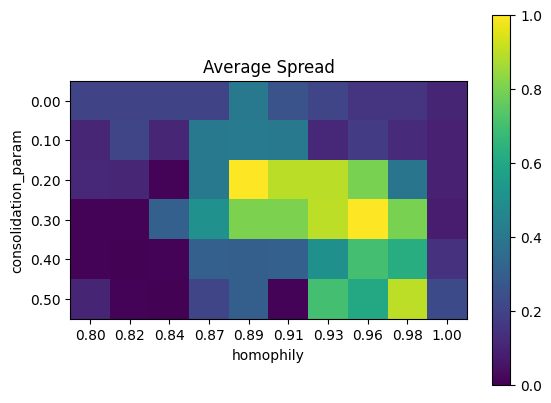

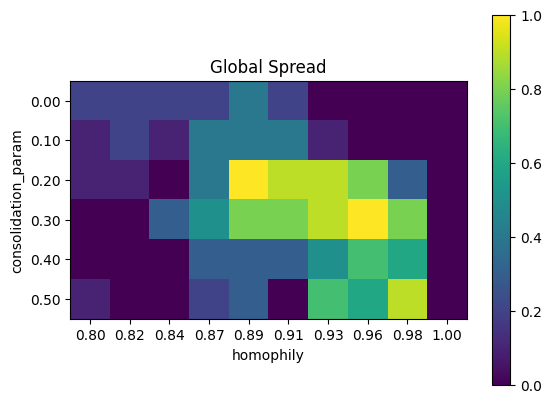

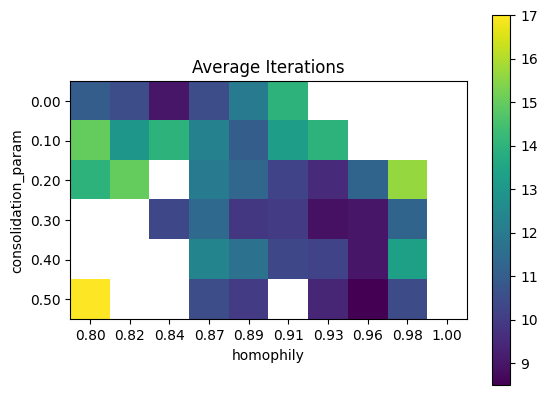

In [10]:
homophily_settings = np.linspace(0.8,1,10)
consolidation_settings = np.linspace(0,0.5, 6)

r_avg, r_spread, r_iter = spread_simulation.setting_simulate('consolidation_param', consolidation_settings,
                                                             'homophily', homophily_settings,
                                                             model_settings, experiment_settings)

## Groups ability to spread:


  0%|          | 0/60 [00:00<?, ?it/s]

consolidation_param: 0.00 / homophily: 0.80 => avg = nan; global = nan; avg iter = nan
consolidation_param: 0.00 / homophily: 0.82 => avg = nan; global = nan; avg iter = nan
consolidation_param: 0.00 / homophily: 0.84 => avg = nan; global = nan; avg iter = nan
consolidation_param: 0.00 / homophily: 0.87 => avg = nan; global = nan; avg iter = nan
consolidation_param: 0.00 / homophily: 0.89 => avg = nan; global = nan; avg iter = nan
consolidation_param: 0.00 / homophily: 0.91 => avg = nan; global = nan; avg iter = nan
consolidation_param: 0.00 / homophily: 0.93 => avg = nan; global = nan; avg iter = nan
consolidation_param: 0.00 / homophily: 0.96 => avg = nan; global = nan; avg iter = nan
consolidation_param: 0.00 / homophily: 0.98 => avg = nan; global = nan; avg iter = nan
consolidation_param: 0.00 / homophily: 1.00 => avg = nan; global = nan; avg iter = nan
consolidation_param: 0.10 / homophily: 0.80 => avg = 0.00; global = 0.00; avg iter = nan
consolidation_param: 0.10 / homophily: 0.

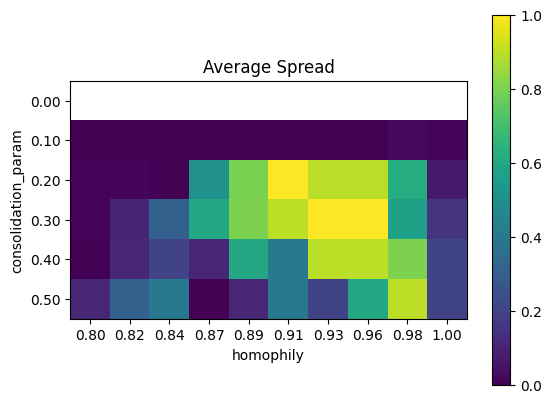

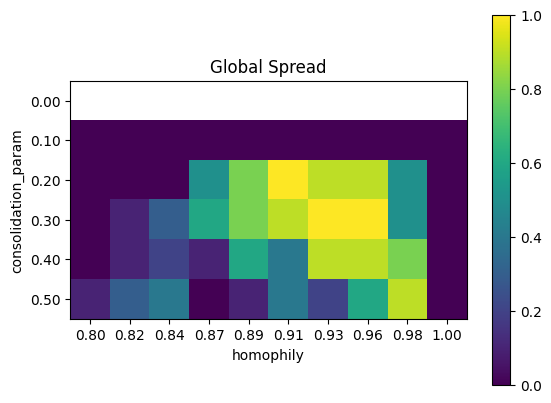

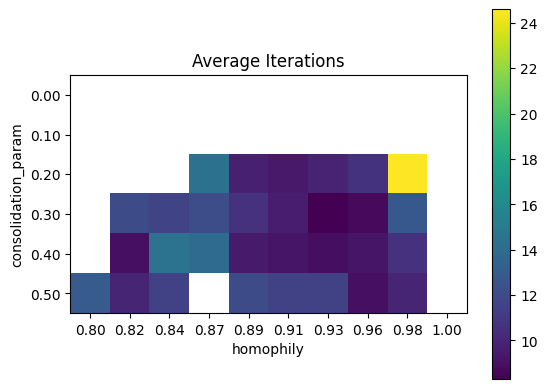

In [11]:
def filter_by_group(group):
    def f(g: nx.Graph) -> list:
        return [x for x, attr in g.nodes('attr') if attr == group]

    return f

model_settings['initial_seed_filter'] = filter_by_group((0,0))
r_avg, r_spread, r_iter = spread_simulation.setting_simulate('consolidation_param', consolidation_settings,
                                                             'homophily', homophily_settings,
                                                             model_settings, experiment_settings)

  0%|          | 0/60 [00:00<?, ?it/s]

consolidation_param: 0.00 / homophily: 0.80 => avg = 0.11; global = 0.10; avg iter = 10.0
consolidation_param: 0.00 / homophily: 0.82 => avg = 0.21; global = 0.20; avg iter = 12.0
consolidation_param: 0.00 / homophily: 0.84 => avg = 0.20; global = 0.20; avg iter = 14.0
consolidation_param: 0.00 / homophily: 0.87 => avg = 0.31; global = 0.30; avg iter = 12.7
consolidation_param: 0.00 / homophily: 0.89 => avg = 0.50; global = 0.50; avg iter = 11.8
consolidation_param: 0.00 / homophily: 0.91 => avg = 0.21; global = 0.20; avg iter = 15.5
consolidation_param: 0.00 / homophily: 0.93 => avg = 0.21; global = 0.00; avg iter = nan
consolidation_param: 0.00 / homophily: 0.96 => avg = 0.20; global = 0.00; avg iter = nan
consolidation_param: 0.00 / homophily: 0.98 => avg = 0.11; global = 0.00; avg iter = nan
consolidation_param: 0.00 / homophily: 1.00 => avg = 0.21; global = 0.00; avg iter = nan
consolidation_param: 0.10 / homophily: 0.80 => avg = 0.01; global = 0.00; avg iter = nan
consolidation_p

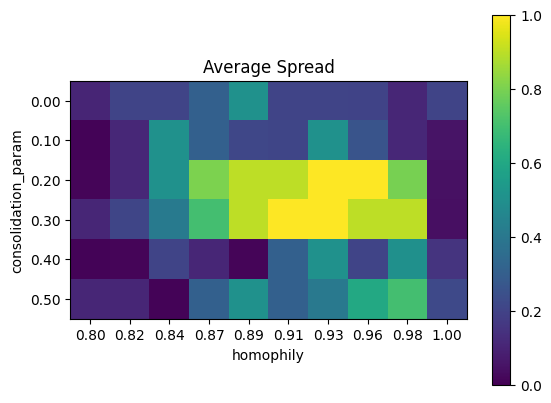

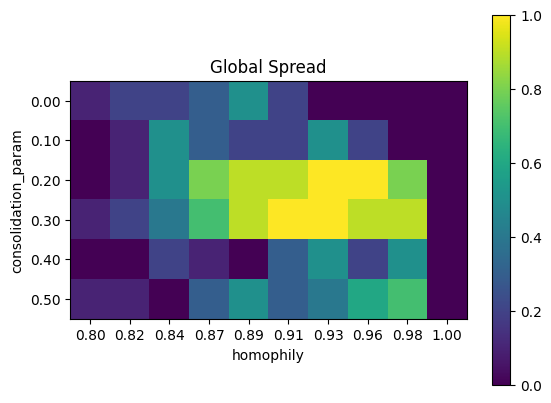

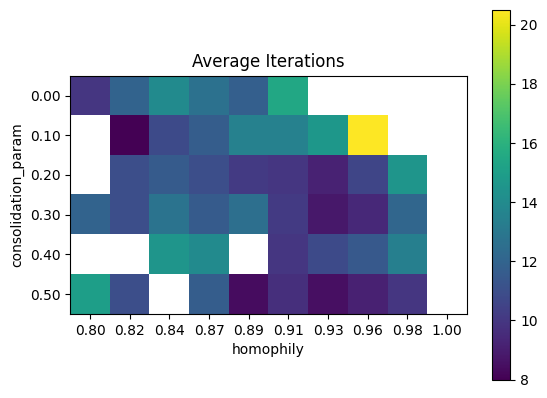

In [12]:
model_settings['initial_seed_filter'] = filter_by_group((0,1))
r_avg, r_spread, r_iter = spread_simulation.setting_simulate('consolidation_param', consolidation_settings,
                                                             'homophily', homophily_settings,
                                                             model_settings, experiment_settings)